In [ ]:
# !pip install numpy
# !pip install matplotlib
# !pip install sklearn
# !pip install tensorflow
# !pip install seaborn

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn import metrics, svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold


In [2]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()
train_images = train_images.reshape(60000, 784)
test_images = test_images.reshape(10000, 784)
train_images = train_images.astype('float32')/255
test_images = test_images.astype('float32')/255

# convert class vectors to binary class matrices
# train_labels = to_categorical(np.ravel(train_labels))
# test_labels = to_categorical(np.ravel(test_labels))

print('train_images shape:', train_images.shape)
print('train_labels shape:', train_labels.shape)
print(train_images.shape[0], 'train samples')
print(test_images.shape[0], 'test samples')

train_images shape: (60000, 784)
train_labels shape: (60000,)
60000 train samples
10000 test samples


# **Linear SVC kernel**

In [3]:
max_c = 0
max_score = 0
for c in [0.01, 0.1, 1, 10, 100]:
    svm_linear = SVC(kernel='linear', C=c)
    svm_linear.fit(train_images, train_labels)

    predict = svm_linear.predict(test_images)
    acc_score = metrics.accuracy_score(test_labels, predict)
#     if acc_score >= max_acc_score:
#         max_acc_score = acc_score
    if acc_score > max_score:
        max_c = c
        max_score = acc_score
    print("C =", c, "=> Score =", acc_score)

C = 0.01 => Score = 0.9443
C = 0.1 => Score = 0.9472
C = 1 => Score = 0.9404
C = 10 => Score = 0.9311
C = 100 => Score = 0.926


In [4]:
max_predict = SVC(kernel='linear', C=max_c).fit(train_images, train_labels).predict(test_images)

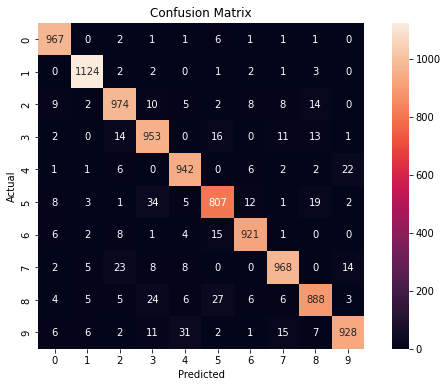

In [5]:
svm = metrics.confusion_matrix(test_labels ,max_predict)
plt.figure(figsize=(10,6))
sns.heatmap(svm, annot=True, square=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
plt.show()

In [6]:
# acc_score = metrics.accuracy_score(test_labels, predict)
# print("Score = ", acc_score )

cl_report = metrics.classification_report(test_labels, max_predict)
print(cl_report)
print(max_score)

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       980
           1       0.98      0.99      0.98      1135
           2       0.94      0.94      0.94      1032
           3       0.91      0.94      0.93      1010
           4       0.94      0.96      0.95       982
           5       0.92      0.90      0.91       892
           6       0.96      0.96      0.96       958
           7       0.95      0.94      0.95      1028
           8       0.94      0.91      0.92       974
           9       0.96      0.92      0.94      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000

0.9472


### **Cách 2: GridSearch**


In [7]:
hyper_params = [ {'C': [0.1, 1, 10, 100]}]
folds = KFold(n_splits = 2, shuffle = True, random_state = 10)

In [8]:
model_cv = GridSearchCV(estimator = SVC(kernel="linear"), 
                        param_grid = hyper_params, 
                        scoring= 'accuracy',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True)    

In [9]:
model_cv.fit(train_images, train_labels)

Fitting 2 folds for each of 4 candidates, totalling 8 fits


GridSearchCV(cv=KFold(n_splits=2, random_state=10, shuffle=True),
             estimator=SVC(kernel='linear'),
             param_grid=[{'C': [0.1, 1, 10, 100]}], return_train_score=True,
             scoring='accuracy', verbose=1)

In [10]:
predict_cv = model_cv.predict(test_images)
acc_score_cv = metrics.accuracy_score(test_labels, predict_cv)

In [11]:
print(model_cv.best_params_)

{'C': 0.1}


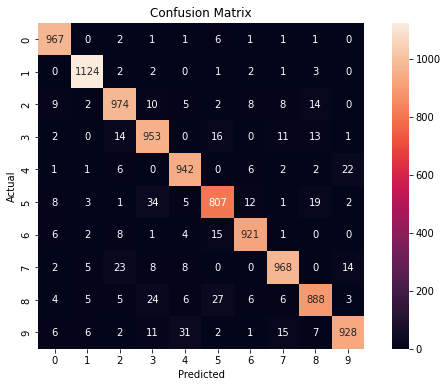

In [12]:
svm = metrics.confusion_matrix(test_labels ,predict_cv)
plt.figure(figsize=(10,6))
sns.heatmap(svm, annot=True, square=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
plt.show()

In [13]:
cl_report_cv = metrics.classification_report(test_labels, predict_cv)
print(cl_report_cv)
print(max_score)

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       980
           1       0.98      0.99      0.98      1135
           2       0.94      0.94      0.94      1032
           3       0.91      0.94      0.93      1010
           4       0.94      0.96      0.95       982
           5       0.92      0.90      0.91       892
           6       0.96      0.96      0.96       958
           7       0.95      0.94      0.95      1028
           8       0.94      0.91      0.92       974
           9       0.96      0.92      0.94      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000

0.9472


# **RBF SVC kernel**

In [3]:
max_c_rbf = 0
max_gamma_rbf = 0
max_score_rbf = 0

for c in [0.01, 0.1, 1, 10]:
    for gamma in [0.001, 0.01, 1]:
        svm_rbf = SVC(kernel='rbf', C=c, gamma=gamma)
        svm_rbf.fit(train_images, train_labels)
        predict_rbf = svm_rbf.predict(test_images)
        acc_score_rbf = metrics.accuracy_score(test_labels, predict_rbf)
        if acc_score_rbf >= max_score_rbf:
            max_c_rbf = c
            max_gamma_rbf = gamma
            max_score_rbf = acc_score_rbf
        print("C =", c , ", gamma=",gamma)
        print("=> Score =", acc_score_rbf)

C = 0.01 , gamma= 0.001
=> Score = 0.8102
C = 0.01 , gamma= 0.01
=> Score = 0.9197
C = 0.01 , gamma= 1
=> Score = 0.1135
C = 0.1 , gamma= 0.001
=> Score = 0.9132
C = 0.1 , gamma= 0.01
=> Score = 0.9555
C = 0.1 , gamma= 1
=> Score = 0.1135
C = 1 , gamma= 0.001
=> Score = 0.9417
C = 1 , gamma= 0.01
=> Score = 0.9769
C = 1 , gamma= 1
=> Score = 0.1725
C = 10 , gamma= 0.001
=> Score = 0.9576
C = 10 , gamma= 0.01
=> Score = 0.9833
C = 10 , gamma= 1
=> Score = 0.1765


In [4]:
max_predict_rbf = SVC(kernel='rbf',
                      C = max_c_rbf,
                      gamma = max_gamma_rbf).fit(train_images, train_labels).predict(test_images)

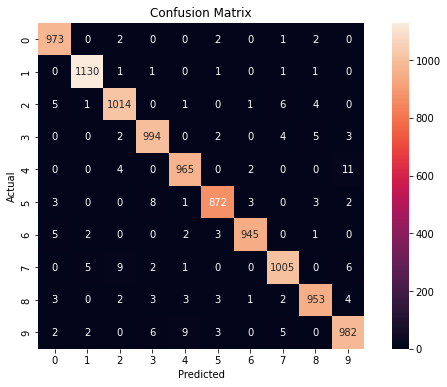

In [5]:
svm_rbf = metrics.confusion_matrix(test_labels , max_predict_rbf)
plt.figure(figsize=(10,6))
sns.heatmap(svm_rbf, annot=True, square=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
plt.show()

In [6]:
cl_report_rbf = metrics.classification_report(test_labels, max_predict_rbf)
print(cl_report_rbf)
print(max_score_rbf)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.98      0.98       892
           6       0.99      0.99      0.99       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

0.9833


# **Polynomial SVC kernel**

In [7]:
max_c_poly = 0
max_degree_poly = 0
max_score_poly = 0

for c in [0.01, 0.1, 1, 10]:
    for degree in [2 , 3 , 4]:
        svm_poly = SVC(kernel='poly', C=c, degree=degree)
        svm_poly.fit(train_images, train_labels)
        predict_poly = svm_poly.predict(test_images)
        acc_score_poly = metrics.accuracy_score(test_labels, predict_poly)
        if acc_score_poly >= max_score_poly:
            max_c_poly = c
            max_degree_poly = degree
            max_score_poly = acc_score_poly
        print("C =", c , ", degree=", degree)
        print("=> Score =", acc_score_poly)

C = 0.01 , degree= 2
=> Score = 0.9174
C = 0.01 , degree= 3
=> Score = 0.8957
C = 0.01 , degree= 4
=> Score = 0.8471
C = 0.1 , degree= 2
=> Score = 0.9597
C = 0.1 , degree= 3
=> Score = 0.9572
C = 0.1 , degree= 4
=> Score = 0.9411
C = 1 , degree= 2
=> Score = 0.9774
C = 1 , degree= 3
=> Score = 0.9771
C = 1 , degree= 4
=> Score = 0.9698
C = 10 , degree= 2
=> Score = 0.9802
C = 10 , degree= 3
=> Score = 0.9786
C = 10 , degree= 4
=> Score = 0.9738


In [8]:
max_predict_poly = SVC(kernel='poly',
                      C = max_c_poly,
                      degree = max_degree_poly).fit(train_images, train_labels).predict(test_images)

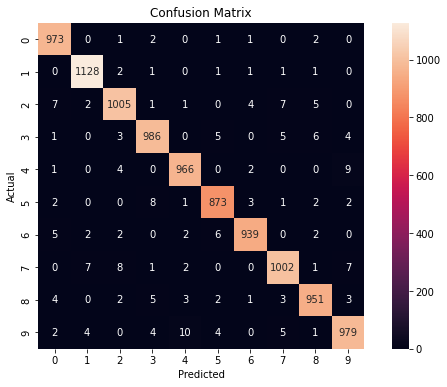

In [9]:
svm_poly = metrics.confusion_matrix(test_labels , max_predict_poly)
plt.figure(figsize=(10,6))
sns.heatmap(svm_poly, annot=True, square=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
plt.show()

In [10]:
cl_report_poly = metrics.classification_report(test_labels, max_predict_poly)
print(cl_report_poly)
print(max_score_poly)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.98      0.98       892
           6       0.99      0.98      0.98       958
           7       0.98      0.97      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.98      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

0.9802


# **Sigmoid SVC kernel**

In [11]:
max_c_sigmoid = 0
max_gamma_sigmoid = 0
max_score_sigmoid = 0

for c in [0.01, 0.1, 1, 10]:
    for gamma in [0.001, 0.01, 1]:
        svm_sigmoid = SVC(kernel='sigmoid', C=c, gamma=gamma)
        svm_sigmoid.fit(train_images, train_labels)
        predict_sigmoid = svm_sigmoid.predict(test_images)
        acc_score_sigmoid = metrics.accuracy_score(test_labels, predict_sigmoid)
        if acc_score_sigmoid >= max_score_sigmoid:
            max_c_sigmoid = c
            max_gamma_sigmoid = gamma
            max_score_sigmoid = acc_score_sigmoid
        print("C =", c , ", gamma=",gamma)
        print("=> Score =", acc_score_sigmoid)

C = 0.01 , gamma= 0.001
=> Score = 0.667
C = 0.01 , gamma= 0.01
=> Score = 0.8872
C = 0.01 , gamma= 1
=> Score = 0.1135
C = 0.1 , gamma= 0.001
=> Score = 0.9005
C = 0.1 , gamma= 0.01
=> Score = 0.8988
C = 0.1 , gamma= 1
=> Score = 0.1138
C = 1 , gamma= 0.001
=> Score = 0.93
C = 1 , gamma= 0.01
=> Score = 0.8432
C = 1 , gamma= 1
=> Score = 0.1145
C = 10 , gamma= 0.001
=> Score = 0.9435
C = 10 , gamma= 0.01
=> Score = 0.8216
C = 10 , gamma= 1
=> Score = 0.1104


In [12]:
max_predict_sigmoid = SVC(kernel='sigmoid',
                      C = max_c_sigmoid,
                      gamma = max_gamma_sigmoid).fit(train_images, train_labels).predict(test_images)

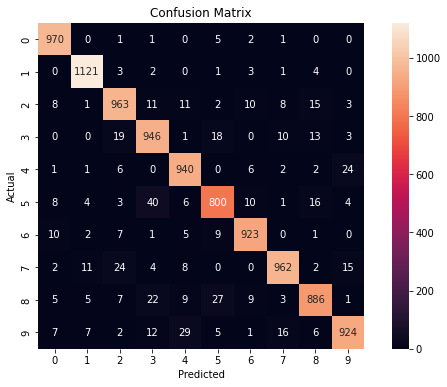

In [13]:
svm_sigmoid = metrics.confusion_matrix(test_labels , max_predict_sigmoid)
plt.figure(figsize=(10,6))
sns.heatmap(svm_sigmoid, annot=True, square=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
plt.show()

In [14]:
cl_report_sigmoid = metrics.classification_report(test_labels, max_predict_sigmoid)
print(cl_report_sigmoid)
print(max_score_sigmoid)

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       980
           1       0.97      0.99      0.98      1135
           2       0.93      0.93      0.93      1032
           3       0.91      0.94      0.92      1010
           4       0.93      0.96      0.94       982
           5       0.92      0.90      0.91       892
           6       0.96      0.96      0.96       958
           7       0.96      0.94      0.95      1028
           8       0.94      0.91      0.92       974
           9       0.95      0.92      0.93      1009

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000

0.9435
